📝 Project: 

Regression on Dynamic Pricing Dataset In this project, we work with a real-world dataset related to dynamic pricing in ride-hailing services. The dataset captures various customer, location, and ride-related factors. Our goal is to build a complete machine learning pipeline—from data exploration and preprocessing to model development and evaluation—to predict the price of a ride under dynamic conditions.

🎯 Objective:

The primary objective is to build and compare multiple regression models to accurately predict the dynamic price of rides. This prediction helps ride-hailing platforms optimize their pricing strategy, balance supply-demand, and improve revenue management.

🤖 Models Evaluated

- MultiLinear Regression

- Polynomial Regression

- Support Vector Regression (SVR)

- Random Forest Regressor

- Tuned Random Forest Regressor

- XGBoost Regressor

Evaluation Metrics To assess model performance, the following regression metrics are used:

- MAE (Mean Absolute Error)

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

These metrics help evaluate the accuracy and consistency of the models in predicting continuous values.

Outcome

By comparing the above models using regression metrics, we aim to:

Identify the most effective model for dynamic pricing prediction

Gain insights into which features influence ride cost the most

Enable data-driven pricing strategies to improve business profitability and user satisfaction

In [2]:
import pandas as pd
import numpy as np 

In [4]:
data = pd.read_csv("C:/Users/SUSHMITHA/Desktop/Rice Image Dataset/Rice_Image_Dataset/diamonds.csv")
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [10]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [18]:
data.isnull()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,False


In [20]:
data.dropna()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [25]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [28]:
target_col = data.columns[-1]
X = data.drop(columns=[target_col])
y = data[target_col]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'XGBoost Regressor': XGBRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_scores = {}

X_train_sample = X_train_scaled[:1000]
y_train_sample = y_train[:1000]
X_test_sample = X_test_scaled[:300]
y_test_sample = y_test[:300]

for name, model in models.items():
    print(f"Training model: {name}...")
    try:
        model.fit(X_train_sample, y_train_sample)
        y_pred = model.predict(X_test_sample)
        mse = mean_squared_error(y_test_sample, y_pred)
        mae = mean_absolute_error(y_test_sample, y_pred)
        r2 = r2_score(y_test_sample, y_pred)

        test_scores[name] = {
            "MSE": mse,
            "MAE": mae,
            "R2": r2
        }

        print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    except Exception as e:
        test_scores[name] = None
        print(f"{name} failed: {e}")


Training model: Linear Regression...
Linear Regression - MSE: 0.0003, MAE: 0.0113, R²: 0.9995
Training model: Ridge Regression...
Ridge Regression - MSE: 0.0003, MAE: 0.0117, R²: 0.9994
Training model: Lasso Regression...
Lasso Regression - MSE: 0.5407, MAE: 0.6294, R²: -0.0068
Training model: Support Vector Regression...
Support Vector Regression - MSE: 0.0116, MAE: 0.0624, R²: 0.9784
Training model: XGBoost Regressor...
XGBoost Regressor - MSE: 0.0013, MAE: 0.0200, R²: 0.9977
Training model: AdaBoost Regressor...
AdaBoost Regressor - MSE: 0.0048, MAE: 0.0509, R²: 0.9911
Training model: Random Forest Regressor...
Random Forest Regressor - MSE: 0.0016, MAE: 0.0226, R²: 0.9971
Training model: Decision Tree Regressor...
Decision Tree Regressor - MSE: 0.0026, MAE: 0.0318, R²: 0.9952


In [36]:
summary_data = pd.DataFrame({
    'Model': list(test_scores.keys()),
    'Test R² Score': [score['R2'] for score in test_scores.values()],
    'Test MSE': [score['MSE'] for score in test_scores.values()],
    'Test MAE': [score['MAE'] for score in test_scores.values()]
}).sort_values(by='Test R² Score', ascending=False).reset_index(drop=True)

print(summary_data)

                       Model  Test R² Score  Test MSE  Test MAE
0          Linear Regression       0.999456  0.000292  0.011255
1           Ridge Regression       0.999423  0.000310  0.011662
2          XGBoost Regressor       0.997672  0.001250  0.020004
3    Random Forest Regressor       0.997073  0.001572  0.022622
4    Decision Tree Regressor       0.995212  0.002572  0.031833
5         AdaBoost Regressor       0.991083  0.004789  0.050888
6  Support Vector Regression       0.978362  0.011621  0.062435
7           Lasso Regression      -0.006774  0.540716  0.629410


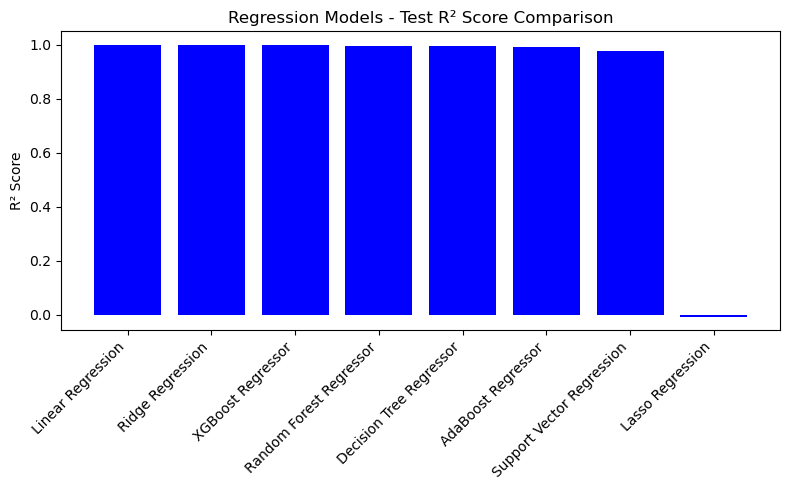

In [38]:
plt.figure(figsize=(8, 5))
plt.bar(summary_data['Model'], summary_data['Test R² Score'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R² Score')
plt.title('Regression Models - Test R² Score Comparison')
plt.tight_layout()
plt.show()